<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/SpaceShip_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!mkdir -p ~/.kaggle

In [12]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [13]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 98.4MB/s]


In [14]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Data Exploration and Data Cleaning


In [143]:
train_dataset = pd.read_csv('/content/train.csv')

In [144]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [145]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [146]:
train_dataset.shape

(8693, 14)

In [147]:
train_dataset = train_dataset.dropna(subset = ['Name']).reset_index(drop = True)

In [148]:
train_dataset.shape

(8493, 14)

In [149]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [150]:
train_dataset['Transported'] = encoder.fit_transform(train_dataset['Transported'])

In [151]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8489,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8490,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8491,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [152]:
mode = train_dataset['HomePlanet'].mode()
train_dataset['HomePlanet'] = train_dataset['HomePlanet'].replace(np.nan,mode[0])

In [153]:
train_dataset['CryoSleep'] = train_dataset['CryoSleep'].replace(np.nan,train_dataset['CryoSleep'].mode()[0])

In [154]:
train_dataset['CryoSleep'] = encoder.fit_transform(train_dataset['CryoSleep'])

In [155]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           197
Destination     178
Age             176
VIP             202
RoomService     180
FoodCourt       178
ShoppingMall    204
Spa             177
VRDeck          184
Name              0
Transported       0
dtype: int64

In [156]:
train_dataset['Destination'] = train_dataset['Destination'].replace(np.nan,train_dataset['Destination'].mode()[0])

In [157]:
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].median())

In [158]:
train_dataset['VIP'] = train_dataset['VIP'].replace(np.nan,train_dataset['VIP'].mode()[0])

In [159]:
train_dataset['VIP'] = encoder.fit_transform(train_dataset['VIP'])

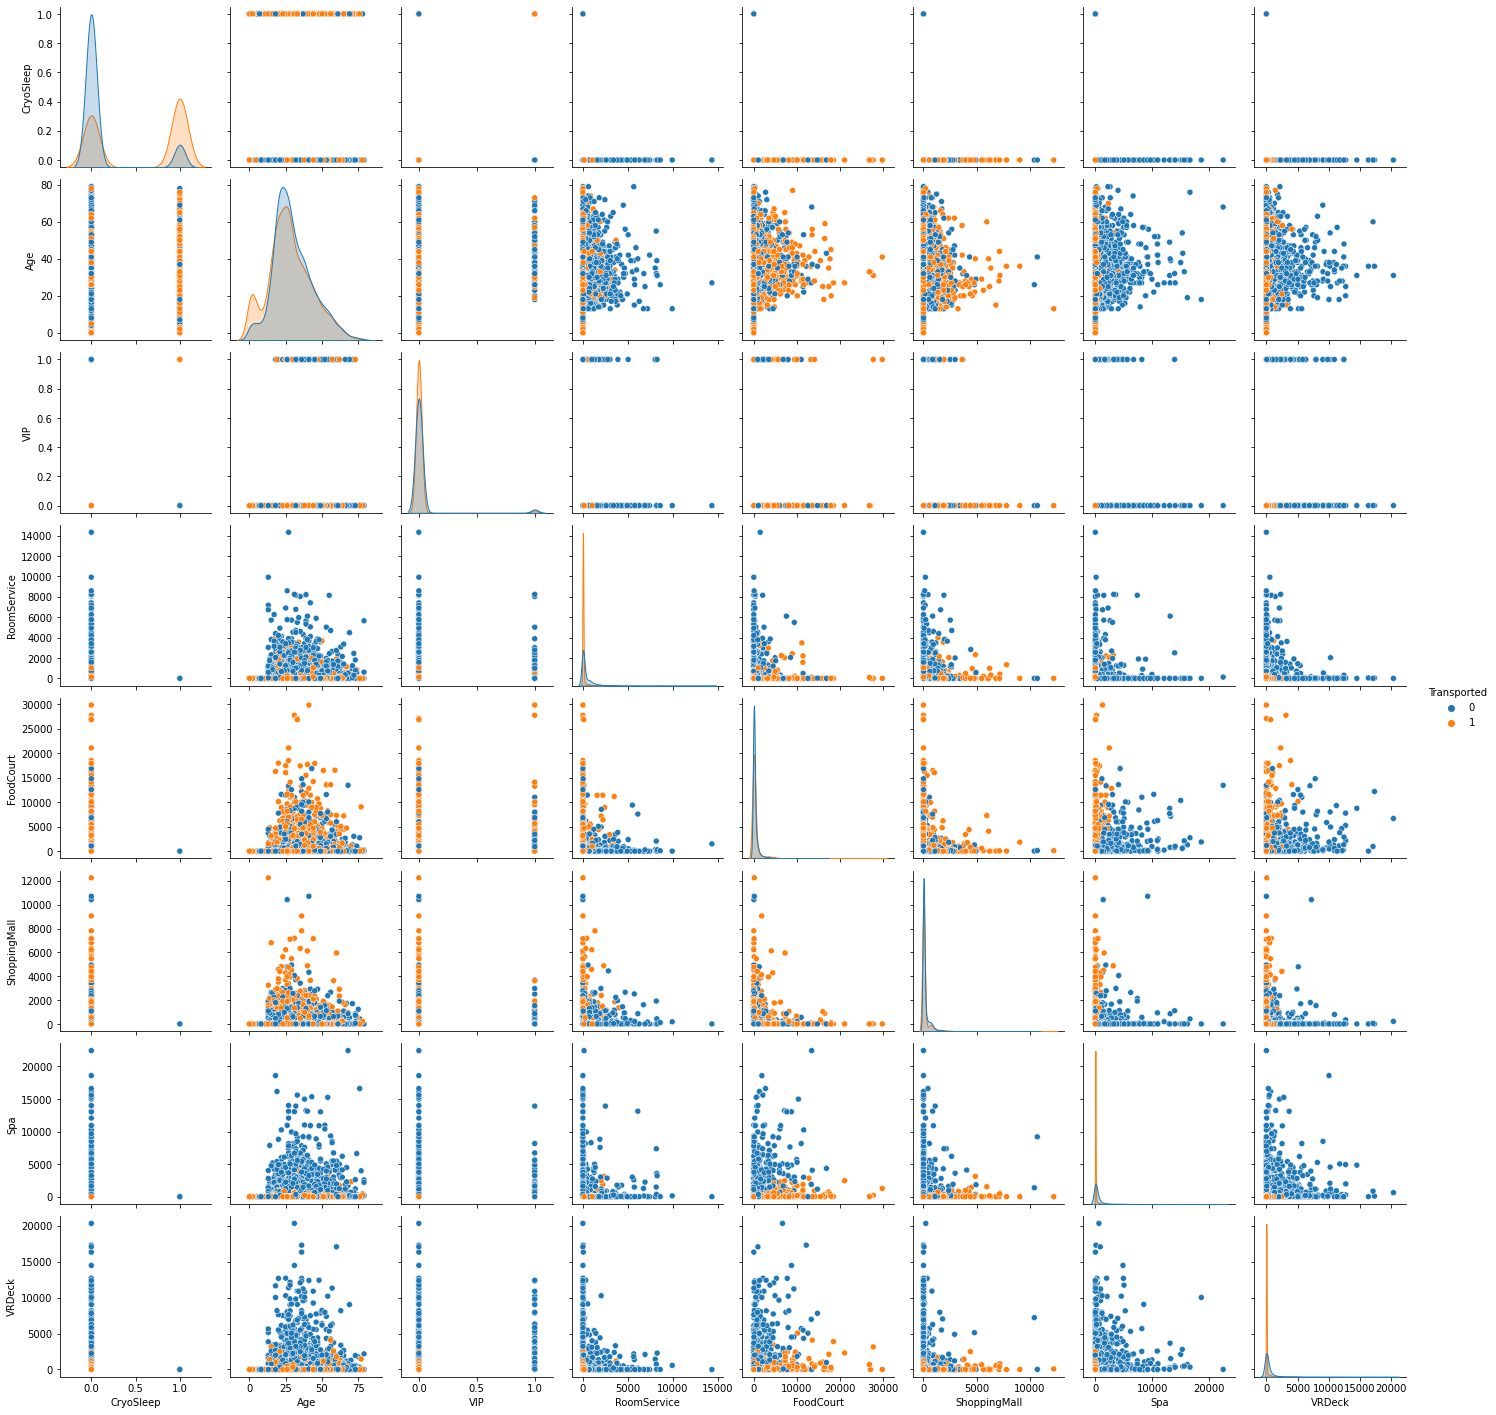

In [160]:
sns.pairplot(train_dataset,hue = 'Transported')

In [161]:
train_dataset['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 62., 15., 43., 47.,
        2., 20., 23., 30., 17., 55.,  4., 21., 19., 56., 25., 38., 36.,
       22., 18., 37., 42., 13., 40.,  3., 54.,  9.,  6., 64., 67., 61.,
       50., 41., 57.,  8., 52., 51., 11., 46., 60., 63., 59.,  5., 79.,
       68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69.,
       72., 77.])

In [162]:
train_dataset['Age_Bin'] = pd.cut(train_dataset['Age'],bins=[-np.inf,12,20,40,120],labels=['Children','Teenage','Adult','Senior Citizen'])

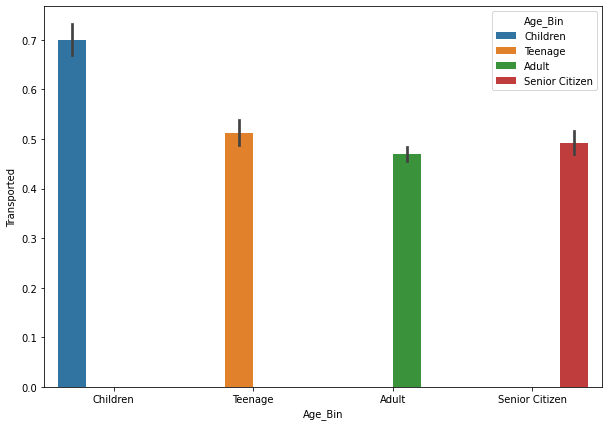

In [163]:
plt.figure(figsize = (10,7))
sns.barplot(data=train_dataset,x="Age_Bin",y="Transported",hue = "Age_Bin")

In [164]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bin
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,Adult
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,Adult
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,Senior Citizen
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,Adult
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,Senior Citizen
8489,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,Teenage
8490,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,Adult
8491,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,Adult


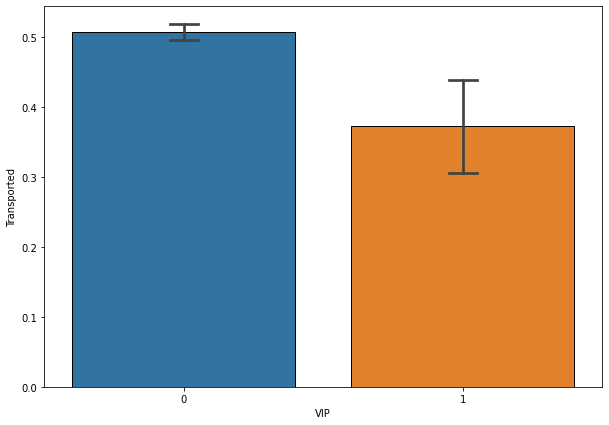

In [165]:
plt.figure(figsize=(10,7))
sns.barplot(data=train_dataset,x = "VIP",y="Transported",capsize=0.1, edgecolor='k')

In [166]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           197
Destination       0
Age               0
VIP               0
RoomService     180
FoodCourt       178
ShoppingMall    204
Spa             177
VRDeck          184
Name              0
Transported       0
Age_Bin           0
dtype: int64

### One Hot Encoding

In [167]:
train_dataset = pd.get_dummies(train_dataset,columns = ['HomePlanet','Age_Bin','Destination'])

In [168]:
train_dataset

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Age_Bin_Children,Age_Bin_Teenage,Age_Bin_Adult,Age_Bin_Senior Citizen,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,1,0,0,0,0,1,0,0,0,1
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,0,1,0,0,0,0,1,0,0,1
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,0,1,0,0,0,1,0,0,0,1
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,...,0,1,0,0,0,0,1,1,0,0
8489,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
8490,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,1
8491,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,...,0,1,0,0,0,1,0,1,0,0
